# 107-1 公共衛生學導論
# 網路留言行為的調查
## Final Report

數據整理：Shao-Ting Chiu 邱紹庭(stevengogogo@gm.ym.edu.tw)

---

## Questions of Interest (目錄)

- [Question 1: '照做，留言'的回答意願v.s.'不留言，把內文複製後用google搜尋答案' 留言頻率v.s.'每日平均在社群網站上（臉書、IG等...）花費的時間'](#Question1)
    - **Solved!** (ANOVA)

- Question 2: 第六題興趣嗜好v.s第二題留言類型(可一項一項比，如"在旅遊類文章留言"v.s."喜歡旅遊"的比率)

    - (A) 第三大題的三題(4&5)分別v.s不願意留言(1&2) 的比例
(你會不會因為某些特殊條件，而變的願意留言？)
        - Skip (時間不夠)

    - (B) (第一題)不留言，把內文複製後用google搜尋答案v.s(第三大題第一題)去文章底下留言意願上升(4、5)
        - Skip (時間不夠)

    - (A)(B)差異的比較，(如果能分別算出兩數據的差異，並拿來比較的話)
        - Skip (時間不夠)
   

- [Question 3: 星座、血型 v.s 照做，留言](#Question-3)
    - **Solved!** (ANOVA)

- [Question 4: '留奇怪的言（比如圓周率、蛋糕作法...)' v.s '朋友知道你去文章底下留言，但不會知道是「什麼樣的文章」'](#Question-4)
    - **Solved!** (Linear Regression)

---

## 數據來源

- [問卷表單](https://docs.google.com/forms/d/1ddjefBj5o_Rik4DeJI84YYa4tAD_-b0T2KbYgVCS910/edit)
- [問卷調查 data](https://docs.google.com/spreadsheets/d/1AT82Im3L1hohHqlo-SrtC2Fsow9h5y9mc36aT7GnVDo/edit#gid=998390675)

## 資料型態
- [CSV Format](表單回應.csv) 
- 139 則留言
- 19 道問題
    - 列表
    ```
       '時間戳記', '照做，留言', '留奇怪的言（比如圓周率、蛋糕作法...）', '不留言，直接忽略', '隱藏此類貼文或檢舉文章',
       '不留言，把內文複製後用google搜尋答案', '其它（簡答）', '複選題~', '你「去文章底下留言」這件事不會被朋友看見',
       '朋友知道你去文章底下留言，但不會知道是「什麼樣的文章」', '你身邊的朋友（3人以上）都在這篇文章底下留言', 
       '每日平均在社群網站上（臉書、IG等...）花費的時間', '在任何文章底下留言的頻率（不計入在不公開社團的留言，比如課業版）',
       '承上題，通常你留言的類型是', '您的性別', '您的血型', '您的年紀', '您的星座', '平日的嗜好/興趣 （複選）'
```
    - Numerical features
        ```
        照做，留言', '留奇怪的言（比如圓周率、蛋糕作法...）', '不留言，直接忽略', '隱藏此類貼文或檢舉文章',
       '不留言，把內文複製後用google搜尋答案', '其它（簡答）', '你「去文章底下留言」這件事不會被朋友看見',
       '朋友知道你去文章底下留言，但不會知道是「什麼樣的文章」', '你身邊的朋友（3人以上）都在這篇文章底下留言'
        ```
    - Categorical features
        ```
        '您的性別', '您的血型', '您的星座'
        ```
- 資料範例

In [1]:
# Display first row of Data
import pandas as pd
data = pd.read_csv("表單回應.csv")
data.head(1)

,時間戳記,照做，留言,留奇怪的言（比如圓周率、蛋糕作法...）,不留言，直接忽略,隱藏此類貼文或檢舉文章,不留言，把內文複製後用google搜尋答案,其它（簡答）,複選題~,你「去文章底下留言」這件事不會被朋友看見,朋友知道你去文章底下留言，但不會知道是「什麼樣的文章」,你身邊的朋友（3人以上）都在這篇文章底下留言,Unnamed: 11,每日平均在社群網站上（臉書、IG等...）花費的時間,在任何文章底下留言的頻率（不計入在不公開社團的留言，比如課業版）,承上題，通常你留言的類型是,您的性別,您的血型,您的年紀,您的星座,平日的嗜好/興趣 （複選）
0,2018/12/16 上午 11:05:41,1.0,1.0,5.0,1.0,1.0,NaN,美食類（來台南絕不能錯過的巷口美食！留言「想吃」讓小編告訴你~）,5.0,5.0,5.0,我從沒在這類文章下留言（選此選項者底下不必勾選）,長（2小時以上）,每月一則以上，少於每週一則,為了特殊活動而留言（例如：需留言分享的抽獎文）,男性,B型,15~19,雙子座,"球類運動, 聽音樂, 外出旅遊, 享受美食, 閱讀小說"


---

### Question1
### '照做，留言'的回答意願 v.s.'不留言，把內文複製後用google搜尋答案' 留言頻率 v.s.'每日平均在社群網站上（臉書、IG等...）花費的時間'

我們想要知道使用者在社群軟體花費的時間與在貼文中留言意願的關聯性

#### Question 1-1: 資料視覺化 
- Link to Figures
    - [Link to Bar Chart](img/q1-1_catplot.pdf)
    - [Link to Swarm Chart](img/q1-2_swarmplot.pdf)
    - [Link to Joint Plot](img/q1-3_joint.pdf)

- 使用 Categorical Plot 呈現三個參數之間的關係
- Labels in [Chart](img/q1-1_catplot.pdf) (因為中文有相容性問題會出現亂碼，所以轉成英文. 越南文也可以)

|Original Meanings|Label in Chart|
|---|---|
|'照做，留言'|'Behavior: Leave Massages'|
|'不留言，把內文複製後用google搜尋答案'|'Behavior: google it than ignore'|
|'每日平均在社群網站上（臉書、IG等...）花費的時間'|'Duration on social media'|

- 無填答者的資料已被 removed

##### [Bar 與 Swarm chart](https://seaborn.pydata.org/generated/seaborn.catplot.html) 資料呈現

<Figure size 432x288 with 0 Axes>

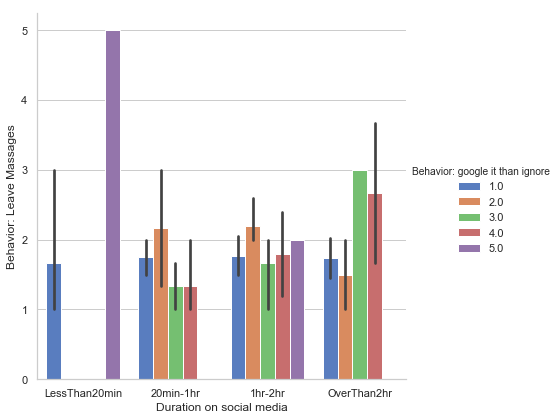

<Figure size 432x288 with 0 Axes>

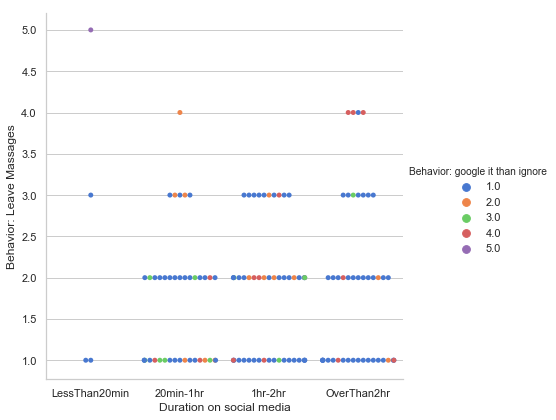

In [45]:
# Question 1-1: Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Retrieve Data
action_obey = data['照做，留言']
action_google = data['不留言，把內文複製後用google搜尋答案' ]
duration_web_chinese = data['每日平均在社群網站上（臉書、IG等...）花費的時間']

## Convert Data to English
def ch2en(string):
    if string == '長（2小時以上）': 
        return 'OverThan2hr'
    elif string == '中等（20分鐘~1小時）':
        return '20min-1hr'
    elif string == '較長（1小時~2小時）':
        return '1hr-2hr'
    elif string == '少（少於20分鐘）':
        return 'LessThan20min'
    else:
        return None

duration_web = []

for string in duration_web_chinese:
    duration_web.append(ch2en(string))

# Combine: Dictionary for Question 1-1

dict_q1 = pd.DataFrame.from_dict({
    'Behavior: Leave Massages': action_obey,
    'Behavior: google it than ignore': action_google,
    'Duration on social media': [str(i) for i in duration_web] # Save as String for plotting Hue
})


## Plotting
sns.set(style="whitegrid")

plt.figure()
g1_1 = sns.catplot(x='Duration on social media', y='Behavior: Leave Massages', 
                hue='Behavior: google it than ignore', 
                order=['LessThan20min','20min-1hr','1hr-2hr','OverThan2hr'], 
                data=dict_q1.dropna(), 
               height=6, kind="bar", palette="muted")

plt.figure()
g1_2 = sns.catplot(x='Duration on social media', y='Behavior: Leave Massages', 
                hue='Behavior: google it than ignore', 
                order=['LessThan20min','20min-1hr','1hr-2hr','OverThan2hr'], 
                data=dict_q1.dropna(), 
               height=6, kind="swarm", palette="muted")


g1_1.savefig('img/q1-1_catplot.pdf')
g1_2.savefig('img/q1-2_swarmplot.pdf')

##### 二維分佈圖 ([Joint Plot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)): '照做，留言'的回答意願 v.s.'不留言，把內文複製後用google搜尋答案' 留言頻率
- Hypothesis
    - 假設觀察到的 order series, 在真實世界中為 continuous distribution 
- Methods
    - I used [kernal density estimation](https://seaborn.pydata.org/generated/seaborn.jointplot.html) (密度估計法) to estimate continuous distribution of two parameters 
        - ('照做，留言'的回答意願 v.s.'不留言，把內文複製後用google搜尋答案' 留言頻率)

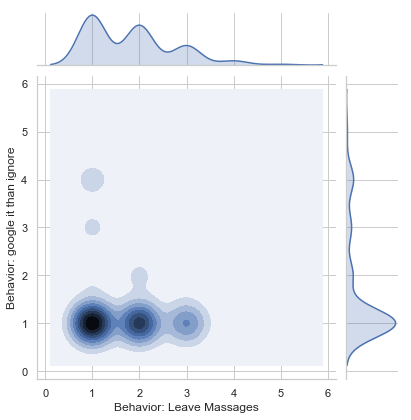

In [46]:
g1_3 = sns.jointplot(x='Behavior: Leave Massages', y='Behavior: google it than ignore', kind="kde",data=dict_q1)
g1_3.savefig('img/q1-3_joint.pdf')

### Question 1-2: Hypothesis Testing 
- 多群組分類的顯著差異分析
    - 使用 [2-way ANOVA 進行統計](https://codingdisciple.com/hypothesis-testing-ANOVA-python.html)。因為：
        - 想知道組間內有沒有差異
- 假設
    - The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

- **'Behavior: Leave Massages'**

    - 'Behavior: Leave Massages' 資料分組

|資料分組|數值|
|---|---|
|'LessThan20min'|'Behavior: Leave Massages'|
|'20min-1hr'|'Behavior: Leave Massages'|
|'1hr-2hr'|'Behavior: Leave Massages'|
|'OverThan2hr'|'Behavior: Leave Massages'|

    - One Way ANOVA
        - Results: No signigicant difference (P>0.01)
        
|F score|P-value|
|---|---|
|1.018|0.387|

- **'Behavior: google it than ignore'**

    - 'Behavior: Leave Massages' 資料分組

|資料分組|數值|
|---|---|
|'LessThan20min'|'Behavior: google it than ignore'|
|'20min-1hr'|'Behavior: google it than ignore'|
|'1hr-2hr'|'Behavior: google it than ignore'|
|'OverThan2hr'|'Behavior: google it than ignore'|


    - One Way ANOVA
        - Results: No signigicant difference (P>0.01)
        
|F score|P-value|
|---|---|
|0.389|0.761|
- References
    1. [Hypothesis Testing with ANOVA in Python](https://codingdisciple.com/hypothesis-testing-ANOVA-python.html)
    2. [ANOVA (2-way, N-way)](https://pythonfordatascience.org/anova-2-way-n-way/)
    3. [ANOVA – Simple Introduction](https://www.spss-tutorials.com/anova-what-is-it/)
    4. [One Way ANOVA on Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
        - The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
            - The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

                1. The samples are independent.
                1. Each sample is from a normally distributed population.
                1. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
    5. 計算過程如下

In [68]:
# Question 1-2: Hypothesis Testing
from scipy import stats

## Retrieve Data 
dict_q1_2 = pd.DataFrame.from_dict({
    'Behavior: Leave Massages': action_obey,
    'Behavior: google it than ignore': action_google,
    'Duration on social media': duration_web
}).dropna()

## Categorization for 'Behavior: Leave Massages'

### ONE WAY ANOVA
b1 = 'Behavior: Leave Massages'
r1 = stats.f_oneway(
    dict_q1_2[dict_q1_2['Duration on social media'] == 'LessThan20min'][b1],
    dict_q1_2[dict_q1_2['Duration on social media'] == '20min-1hr'][b1],
    dict_q1_2[dict_q1_2['Duration on social media'] == '1hr-2hr'][b1],
    dict_q1_2[dict_q1_2['Duration on social media'] == 'OverThan2hr'][b1]
)

b2 = 'Behavior: google it than ignore'
r2 = stats.f_oneway(
    dict_q1_2[dict_q1_2['Duration on social media'] == 'LessThan20min'][b2],
    dict_q1_2[dict_q1_2['Duration on social media'] == '20min-1hr'][b2],
    dict_q1_2[dict_q1_2['Duration on social media'] == '1hr-2hr'][b2],
    dict_q1_2[dict_q1_2['Duration on social media'] == 'OverThan2hr'][b2]
)

print('ITEM: {};\t F-score: {};\t P-value: {}'.format(b1, r1[0], r1[1]))
print('ITEM: {};\t F-score: {};\t P-value: {}'.format(b2, r2[0], r2[1]))

ITEM: Behavior: Leave Massages;	 F-score: 1.0180903805369004;	 P-value: 0.38691985007433216
ITEM: Behavior: google it than ignore;	 F-score: 0.3890504533237505;	 P-value: 0.7610736515715244


## Question 3
## 星座、血型 v.s 照做，留言
想知道 星座、血型 v.s 照做，留言 之間的差異

- 已去除未知血型的使用者

#### Question 2-1: Data Visualization
- Link to Figures
    - [Link to Bar Chart](img/q2-1_catplot.pdf)
    - [Link to Swarm Chart](img/q2-2_swarmplot.pdf)

<Figure size 432x288 with 0 Axes>

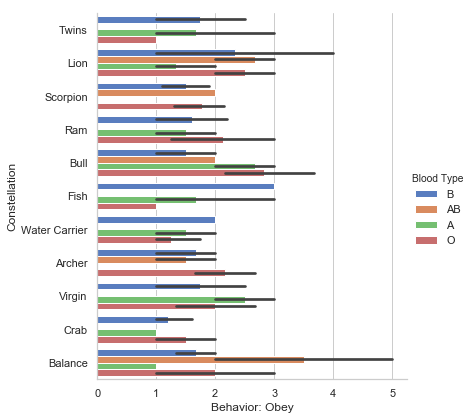

<Figure size 432x288 with 0 Axes>

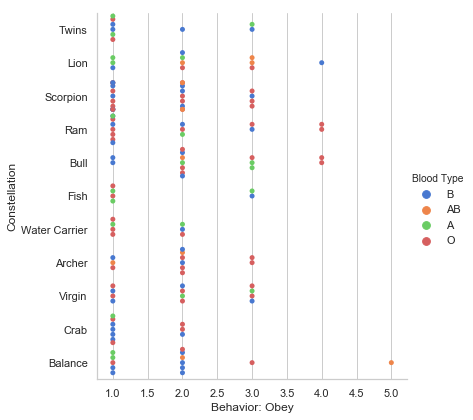

In [82]:
# Question 2-1: Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Retrieve Data
blood_type_chinese = data['您的血型']
star_chinese = data['您的星座']
behavior_obey = data['照做，留言']

## Translate to Englist
def ch2en_blood(string):
    if string == 'B型':
        return 'B'
    elif string== 'AB型':
        return 'AB'
    elif string== 'A型':
        return 'A'
    elif string== 'O型':
        return 'O'
    else:
        return None

def ch2en_star(string):
    dict_star = {
        '雙子座':'Twins', 
        '獅子座':'Lion', 
        '魔羯座':'Scorpion', 
        '牡羊座':'Ram', 
        '金牛座':'Bull', 
        '雙魚座':'Fish', 
        '水瓶座':'Water Carrier', 
        '射手座':'Archer', 
        '處女座':'Virgin',
        '天蠍座':'Scorpion', 
        '巨蟹座':'Crab', 
        '天秤座':'Balance'
    }
    try:
        return dict_star[string]
    except:
        return None

## Translate to English
blood_type = [ch2en_blood(i) for i in blood_type_chinese]
star = [ch2en_star(i) for i in star_chinese]

## Combine
dict_q2 = pd.DataFrame.from_dict({
    'Blood Type': blood_type,
    'Constellation': star,
    'Behavior: Obey':behavior_obey
})

## Plotting
sns.set(style="whitegrid")

plt.figure()
g2_1 = sns.catplot(y='Constellation', x='Behavior: Obey', 
                hue='Blood Type', 
                data=dict_q2.dropna(), 
               height=6, kind="bar", palette="muted")

plt.figure()
g2_2 = sns.catplot(y='Constellation', x='Behavior: Obey', 
                hue='Blood Type', 
                data=dict_q2.dropna(), 
               height=6, kind="swarm", palette="muted")


g2_1.savefig('img/q2-1_catplot.pdf')
g2_2.savefig('img/q2-2_swarmplot.pdf')


### Question 2-2: Hypothesis Testing
- One way ANOVA for "血型" and "照做"

|F-score|P-value|
|---|---|
|2.356559300977521|0.07484796863287467|

- One way ANOVA for "星座" and "照做"

|F-score|P-value|
|---|---|
|1.4214697564183774|0.16896009760395297|

- 結論
    - No significent difference is found (P>0.01)

In [89]:
# Question 1-2: Hypothesis Testing
from scipy import stats

## Retrieve Data 
dict_q2_2 = pd.DataFrame.from_dict({
    'Blood Type': blood_type,
    'Constellation': star,
    'Behavior: Obey':behavior_obey
}).dropna()

## Categorization for 'Behavior: Leave Massages'

### ONE WAY ANOVA
b1 = 'Behavior: Obey'
bk1 = 'Blood Type'
r1 = stats.f_oneway(
    dict_q2_2[dict_q2_2[bk1] == 'A'][b1],
    dict_q2_2[dict_q2_2[bk1] == 'AB'][b1],
    dict_q2_2[dict_q2_2[bk1] == 'B'][b1],
    dict_q2_2[dict_q2_2[bk1] == 'O'][b1]
)

b2 = 'Behavior: Obey'
bk2 = 'Constellation'
r2 = stats.f_oneway(
    dict_q2_2[dict_q2_2[bk2] == 'Twins'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Lion'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Scorpion'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Ram'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Bull'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Fish'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Water Carrier'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Archer'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Virgin'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Scorpion'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Crab'][b2],
    dict_q2_2[dict_q2_2[bk2] == 'Balance'][b2],
)

print('ITEM: {};\t F-score: {};\t P-value: {}'.format(b1, r1[0], r1[1]))
print('ITEM: {};\t F-score: {};\t P-value: {}'.format(b2, r2[0], r2[1]))

ITEM: Behavior: Obey;	 F-score: 2.356559300977521;	 P-value: 0.07484796863287467
ITEM: Behavior: Obey;	 F-score: 1.4214697564183774;	 P-value: 0.16896009760395297


### Question 4
### '留奇怪的言（比如圓周率、蛋糕作法...)' v.s '朋友知道你去文章底下留言，但不會知道是「什麼樣的文章」'
- Methods
    - 使用[回歸分析](https://wizardforcel.gitbooks.io/scipy-lecture-notes/content/14.html)
    - 分析結果如下 
        - 低度線性相關 $R^{2}=0.012$

<Figure size 432x288 with 0 Axes>

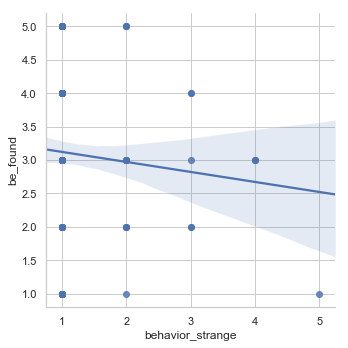

In [112]:
# Data Visualization
from statsmodels.formula.api import ols 
## Retrieve Data
behavior_strange = data['留奇怪的言（比如圓周率、蛋糕作法...）']
be_found = data['朋友知道你去文章底下留言，但不會知道是「什麼樣的文章」']

## Combine Data
data_q4 = pd.DataFrame.from_dict({
    'behavior_strange': behavior_strange,
    'be_found': be_found
})

data_q4 = data_q4.dropna()

## Plotting
sns.set(style="whitegrid")

plt.figure()
g1_3 = sns.lmplot(x='behavior_strange', y='be_found', data=data_q4)
g1_3.savefig('img/q4-1_joint.pdf')

In [99]:
# Linear Regression

model = ols("behavior_strange ~ be_found", data_q4).fit()

## Regression Result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       behavior_strange   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sat, 05 Jan 2019   Prob (F-statistic):              0.201
Time:                        14:19:17   Log-Likelihood:                -142.34
No. Observations:                 135   AIC:                             288.7
Df Residuals:                     133   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5120      0.206      7.349      0.0

[Back to Top](#Final-Report)